### Motif
* MyGrad is pretty cool, **but:**
 * need to keep track of several variables for every layer $\to$ gets cumbersome
 * don't want to keep rewriting same chunks of code
   * want to have them in redily available methods
   * want to avoid errors

# [MyNN](https://github.com/LLCogWorks2018/MyNN)
* Fulfils our (abovementioned) motifs
* Similar to PyTorch
 * not quite as optimized
 * at times more convenient to use
* Packages layers into a function *dense*
 * layers contain their own parameters
* Has functions to create weights better
* Has own gradient descent functions!!!
* Also, can write a custom Model class

# Application: Tendril Classifier
* Same idea as the MyGrad implementation
* Let's use MyNN to see its advantages

In [8]:
import numpy as np
import mygrad as mg
import matplotlib.pyplot as plt
from datasets import ToyData

In [29]:
# import MyNN stuff to use
from mynn.layers.dense import dense
from mynn.activations.relu import relu
from mynn.initializers.normal import normal
from mynn.losses.cross_entropy import softmax_cross_entropy
from mynn.optimizers.sgd import SGD

In [15]:
def accuracy(predictions, truth):
    if isinstance(predictions, mg.Tensor):
        predictions = predictions.data
    return np.mean(np.argmax(predictions, axis=1) == truth)

In [31]:
# using this Model class allows us to only need to define the pipline once
class Model:
    def __init__(self, n, dims, tendrils):
        '''
        Initializes the network's parameters and creates a network object
        '''
        self.dense1 = dense(dims, n, weight_initializer=normal)
        self.dense2 = dense(n, tendrils, weight_initializer=normal)
        
    def __call__(self, x):
        '''
        Preforms forward pass on the network
        '''
        return self.dense2(relu(self.dense1(x)))
        
    @property
    def parameters(self):
        '''
        Returns all of the parameters of the network
        '''
        return self.dense1.parameters + self.dense2.parameters

In [30]:
# This cell preprocesses data and resets network parameters

N = 25

dims = 2     # dimensionality of input
tendrils = 7 # dimensionality of output
data = ToyData(num_classes=tendrils, dimensionality=dims)
xtrain, ytrain, xtest, ytest = data.load_data()

idxs = np.arange(xtrain.shape[0])

# call model instead of directly creating parameters
# only need to keep track of model object, not all of its parameters like we did before
model = Model(N, dims, tendrils)
optim = SGD(model.parameters, learning_rate=0.1)

<IPython.core.display.Javascript object>


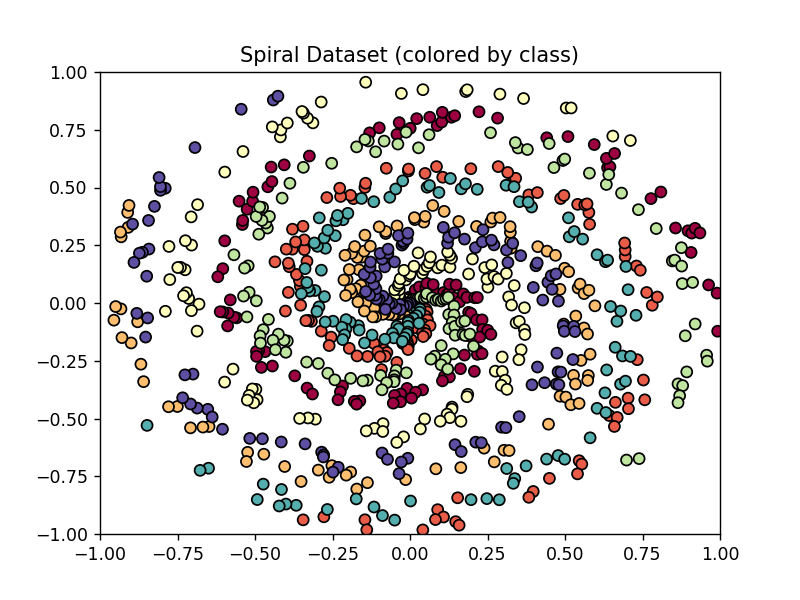

In [20]:
%matplotlib notebook
fig, ax = data.plot_spiraldata()

In [25]:
# This cell trains the network
# Testing data accuracies are printed below
# Re-run this cell to keep training

batch_sz = 50

for epoch in range(5000):
    np.random.shuffle(idxs)
    for idxs_batch in np.split(idxs, batch_sz):
        # forward pass
        x_batch = xtrain[idxs_batch]
        y_batch = ytrain[idxs_batch]
        # main difference from before: the network is much simplet to call
        # don't need to call each layer, already predefined in the model class
        y_pred_batch = model(x_batch)
        loss = softmax_cross_entropy(y_pred_batch, y_batch)
        
        # backward pass
        loss.backward()
        optim.step()
        loss.null_gradients()
    if epoch % 100 == 0:
        # test
        y_pred = model(xtest)
        acc = accuracy(y_pred, ytest)
        
        print(acc)

0.171428571429
0.242857142857
0.378571428571
0.492857142857
0.55
0.578571428571
0.628571428571
0.678571428571
0.714285714286
0.678571428571
0.728571428571
0.685714285714
0.714285714286
0.692857142857
0.692857142857
0.721428571429
0.7
0.714285714286
0.771428571429
0.778571428571
0.735714285714
0.728571428571
0.742857142857
0.728571428571
0.742857142857
0.764285714286
0.757142857143
0.757142857143
0.785714285714
0.735714285714
0.792857142857
0.75
0.778571428571
0.778571428571
0.764285714286
0.785714285714
0.75
0.764285714286
0.757142857143
0.742857142857
0.75
0.778571428571
0.771428571429
0.757142857143
0.75
0.75
0.778571428571
0.8
0.75
0.742857142857


<IPython.core.display.Javascript object>


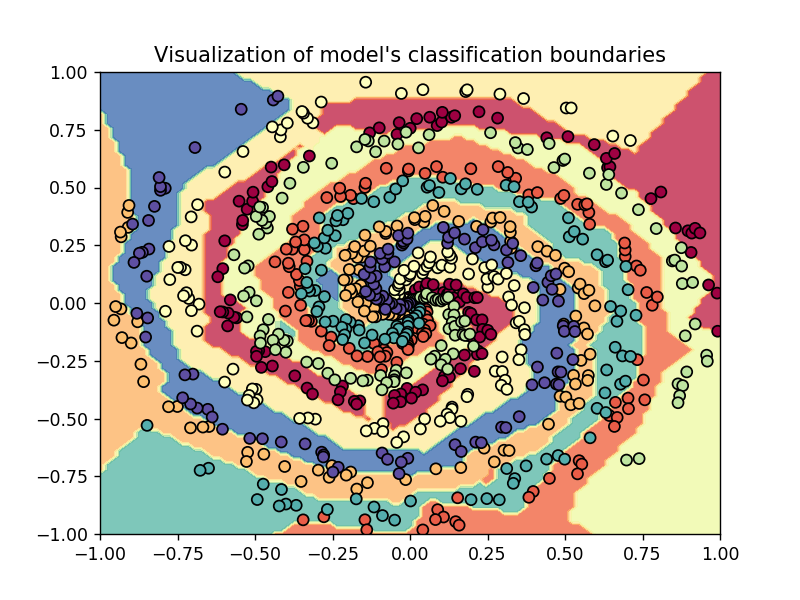

In [28]:
def dummy_function(x):
    from mygrad.nnet.activations import softmax
    return softmax(model(x)).data

fig, ax = data.visualize_model(dummy_function, entropy=False)
ax.set_ylim(-1, 1)
ax.set_xlim(-1, 1);